In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data_df = pd.read_csv('http://bit.ly/w-data')
data_df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data_df.shape


(25, 2)

In [4]:
#DATA EXPLORATION
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data_df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data_df.isnull().sum()


Hours     0
Scores    0
dtype: int64

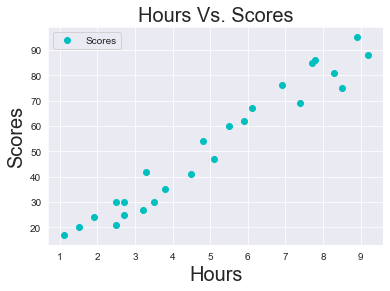

In [8]:
#DATA VISUALIZATION
sns.set_style('darkgrid')
plt.plot(data_df['Hours'],data_df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('Hours Vs. Scores',fontsize = 20)
plt.legend(['Scores']);



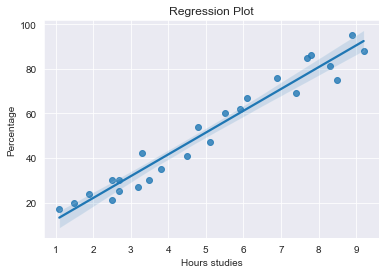

In [9]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');


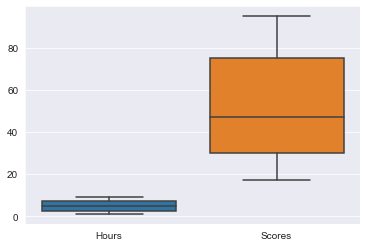

In [10]:
#BOXPLOT OF DATASET
sns.boxplot(data=data_df[['Hours','Scores']]);


In [11]:
#SPLITTING THE DATASET
X = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)


In [13]:
X_train.shape, X_test.shape 


((18, 1), (7, 1))

In [14]:
#TRAINING THE MODEL
#WE WILL THE 80% OF THE TRAINING DATA TO TRAIN THE MODEL.

from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)


LinearRegression()

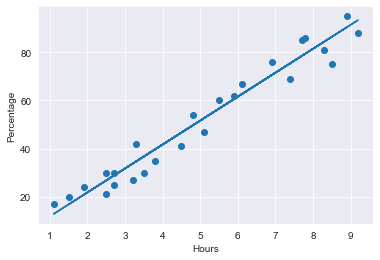

In [15]:
line = lg.coef_ * X + lg.intercept_
plt.scatter(data_df['Hours'],data_df['Scores'])
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');


In [16]:
#MAKING PREDICTION
#NOW, WE WILL TEST OUR ALGORITHM WITH THE REST 20% OF THE DATA THAT WE HAVE SPLITTED AND MAKE PREDICTIONS.

y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction


,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


In [17]:
#COMPAIRING ACTUAL SCORE VS.PREDICTED SCORE
pred = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score%':y_pred})
pred


,Actual Score,Predicted Score%
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


In [18]:
hours = np.array([[9.25]])
pred = lg.predict(hours)
print('No. of hours = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%pred)


No. of hours = 9.25
Predicted Score = 93.89


In [19]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error = %.2f'%mean_absolute_error(Y_test,y_pred))


Mean absolute error = 4.14
